In [1]:
%matplotlib inline
from itertools import islice
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG, display, YouTubeVideo

figsize = (12,12)



# Data Visualization in Python

Brian Baquiran 

## Hello World of Data!

Introduction to the tools for working with data in Python:

* Anaconda Python distribution and `conda` tool
* Jupyter Notebook
* `numpy` and `pandas`

Please proceed to **Classroom 3**

_Men are welcome to attend!_


<img src="wwcodelogo.png">

## @brianbaquiran 

* Software engineer for ~20 years, programming since mid-1980's
* First used Python in 2004
* Used Python to build back-end telco systems
* coach for Women Who Code machine learning & data science study groups

<img src="pezlogo.png">


* NY based data science & analytics company
* Specializing in NLP and information extraction
* Clients in US and Philippines

## Outline

1. Why Visualization
    1. A picture is worth a thousand words (cave drawings in France)
    1. Visualization as part of the scientific process
          1. Explore data
              1. Data lies (summary statistics can hide patterns)
          1. Communicate results
              1. Florence nightingale's coxcomb diagram
1. Process
    1. Raw data
        1. Format and representation (human readable vs. machine readable)
        1. Dimensions, types
            1. Continuous data
                1. range (min, max)
                1. centrality (mean, median, mode)
            1. Discrete data (nominal or ordinal)
        1. Prepare for analysis - convert to tabular format
        1. Transform (scale, reduce dimensions)
1. Visualization in Python
    1. Matplotlib
    1. Seaborn
    1. Bokeh
1. More challenging data
    1. Heatmaps
    1. Text
        1. Bag of words
        1. Vector space model
    1. Graphs and networks
        1. Dendograms
        1. Social networks
    1. Maps
        1. Folium
        1. Geo
1. Animation
1. Interactivity

1. Beyond 
    1. http://pixelmonkey.org/pub/dataviz-elements/notes/index.html
    1. https://mpld3.github.io/
    1. Vega and Vega Lite
1. Takeaways
    1. Any data can be visualized, if you can apply the appropriate transformations
    1. Python offers many tools for data viz, at varying levels of ease-of-use and power

In [2]:
# Set up some sample data

ts = pd.DataFrame(np.random.randn(365), index=pd.date_range('1/1/2017', periods=365), columns=['balance'])
time_series_data = ts.cumsum()


# A picture is worth a thousand words



In [152]:
display(time_series_data.head(20))

,balance
2017-01-01,-0.452196
2017-01-02,-1.100193
2017-01-03,-0.549932
2017-01-04,-1.466446
2017-01-05,-2.261092
2017-01-06,-2.201458
2017-01-07,-4.432866
2017-01-08,-3.687008
2017-01-09,-3.318768
2017-01-10,-4.065905


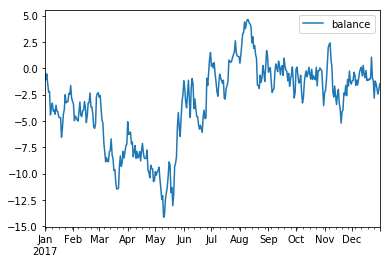

In [4]:
time_series_data.plot()
plt.show()

# Data Analysis and Visualization go hand-in-hand

When sophisticated analysis can be performed quickly, the results can be presented in ways that are easy to consume while allowing queries and encouraging exploration.

* Allow the audience to dive deeper into the data
* Use the insights for faster, more effective decisions

# Visualization is communication

* Determine what you are trying to visualize and and what kind of information you want to communicate
* Know your audience and how they process visual information
* Use a visual that conveys the information in the best and simplest form for your audience

# Understand your data

* Size and types
* Cardinality
  * uniqueness of data values in a column
* Data preparation requirements


# Tidy Data
Structure your data to make it easier to analyze and visualize
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

| name         | treatment | result |
|--------------|-----------|--------|
| John Smith   | a         |        |
| Jane Doe     | a         | 16     |
| Mary Johnson | a         | 3      |
| John Smith   | b         | 2      |
| Jane Doe     | b         | 11     |
| Mary Johnson | b         | 1      |

# Basic charting with `matplotlib` and `seaborn`

  * Easy to learn and start using
  * Lots of built-in plots (see the [Gallery](https://matplotlib.org/gallery/index.html))
  * Seaborn makes Matplotlib prettier by default, adds customized themes
  * Seaborn includes handy statistical tools for fitting regressions and density functions

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Line Charts

* Line charts show the relationship of one variable to another. 
* They are most often used to track changes or trends over time
* Useful to compare multiple items over same time period 
    * The stacking lines are used to compare the trend or individual values for several variables

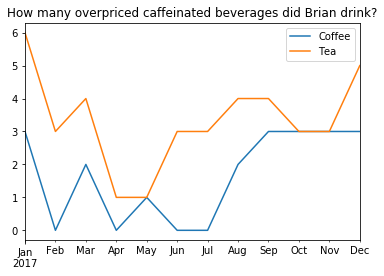

In [115]:
# Fake data. I don't really drink overpriced coffee

coffee_plus = pd.DataFrame({'Coffee': np.random.randint(0,4, size=12),
             'Tea': np.random.randint(0,4, size=12)}, index=pd.date_range(start='1/1/2017', freq='M', periods=12 ))
coffee_plus.plot(stacked=True, title="How many overpriced caffeinated beverages did Brian drink?")
plt.show()

Note how we didn't even need to use `matplotlib`!

## In general, `matplotlib` and `seaborn` charting functions follow a pattern

```
plt.<chart_type>(x="x_col", y="y_col", data=df)
```

# Bar Charts

Compare the quantities of different categories or groups

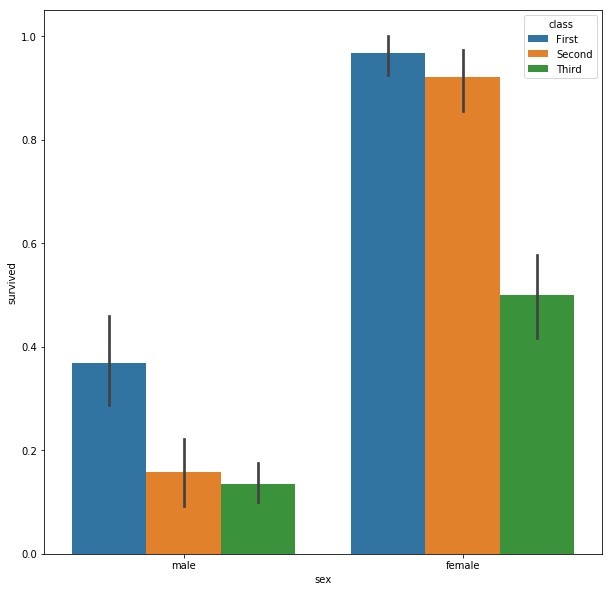

In [7]:
titanic = sns.load_dataset('titanic')
plt.figure(figsize=(10,10))
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

# Histograms for univariate data

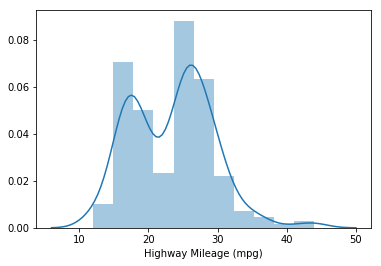

In [137]:
mpg_df = pd.read_csv("mpg.csv")
hwy_mileage = mpg_df.hwy.loc[mpg_df['class']=="subcompact"]
sns.distplot(mpg_df.hwy)
plt.xlabel("Highway Mileage (mpg)")
plt.show()

# Scatter Plots for bivariate data

Examine the relationship, or correlations between two variables

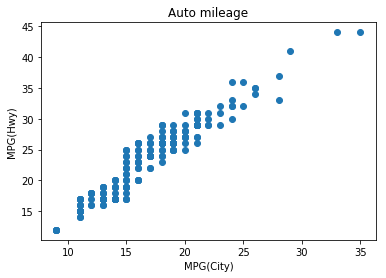

In [83]:
plt.scatter(x='cty', y='hwy', data=mpg_df)
plt.xlabel('MPG(City)')
plt.ylabel('MPG(Hwy)')
plt.title("Auto mileage")
plt.show()

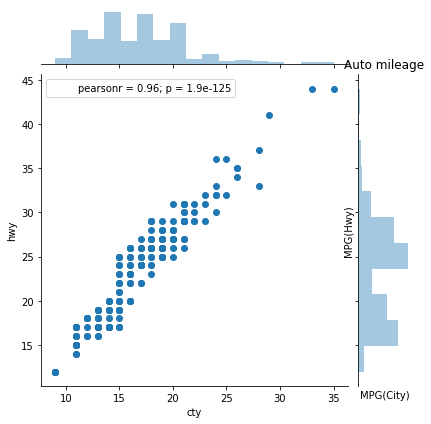

In [84]:
sns.jointplot(x='cty', y='hwy', data=mpg_df)
plt.xlabel('MPG(City)')
plt.ylabel('MPG(Hwy)')
plt.title("Auto mileage")
plt.show()

# Box Plots
Displays five summary statistics:
* lower minimum
* lower quartile
* median
* upper quartile
* maximum 

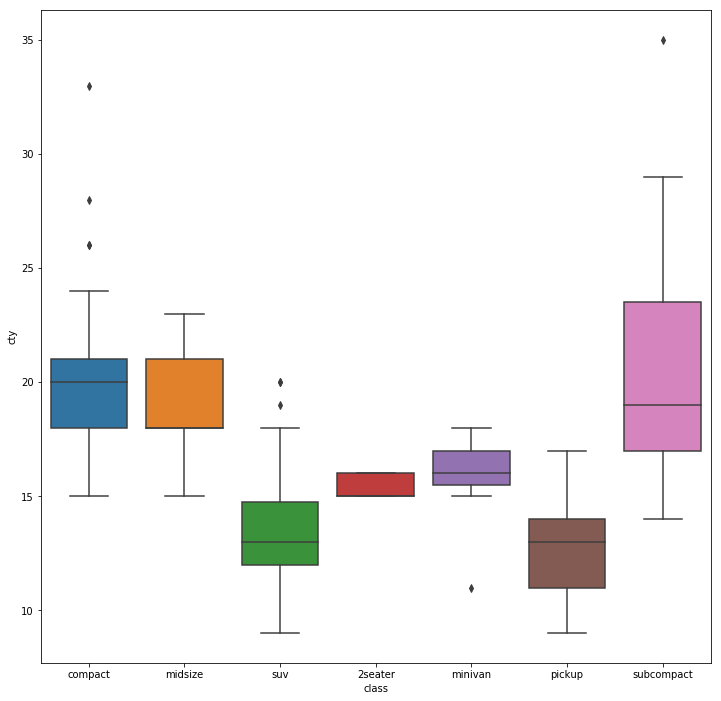

In [70]:
plt.figure(figsize=figsize)
sns.boxplot(y="cty", x="class", data=mpg_df)
plt.show()

# Violin plot

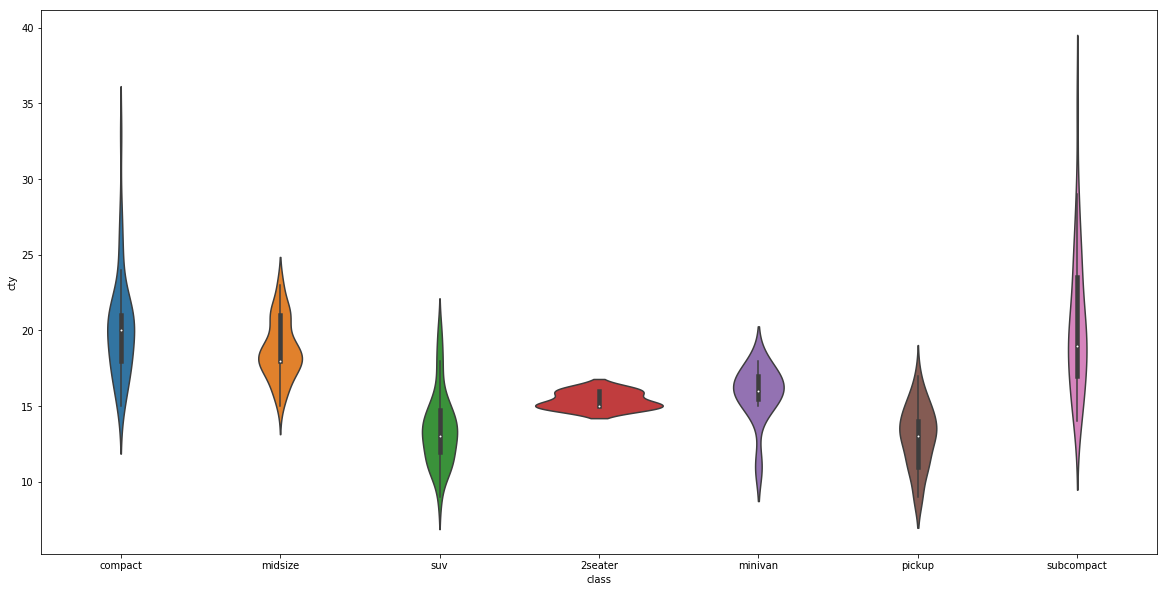

In [10]:
plt.figure(figsize=(20,10))
sns.violinplot(x="class", y="cty", data=mpg_df)
plt.show()

# Visualizing linear relationships between variables

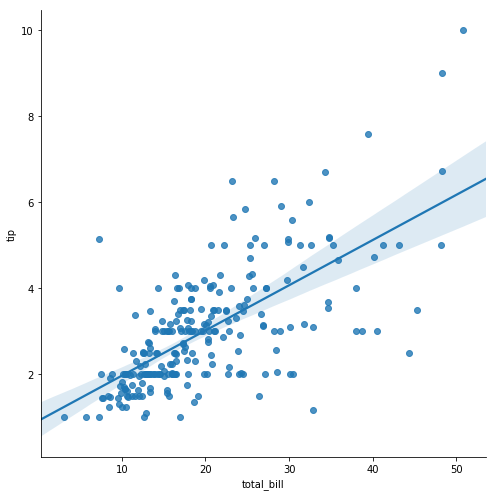

In [125]:
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", data=tips, size=7);

You can split the data on a categorical variable

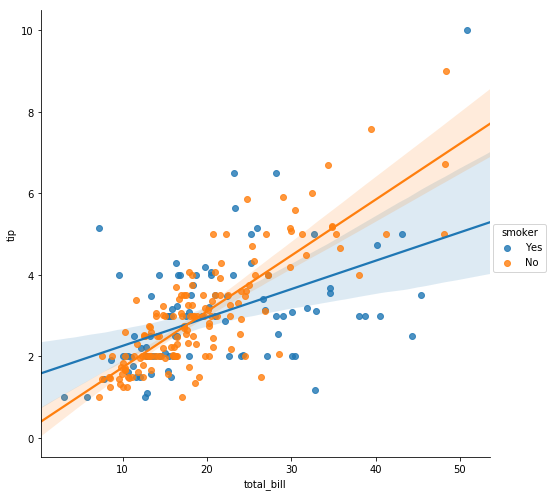

In [126]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, size=7);

# Faceting - creating sub-plots based on variable

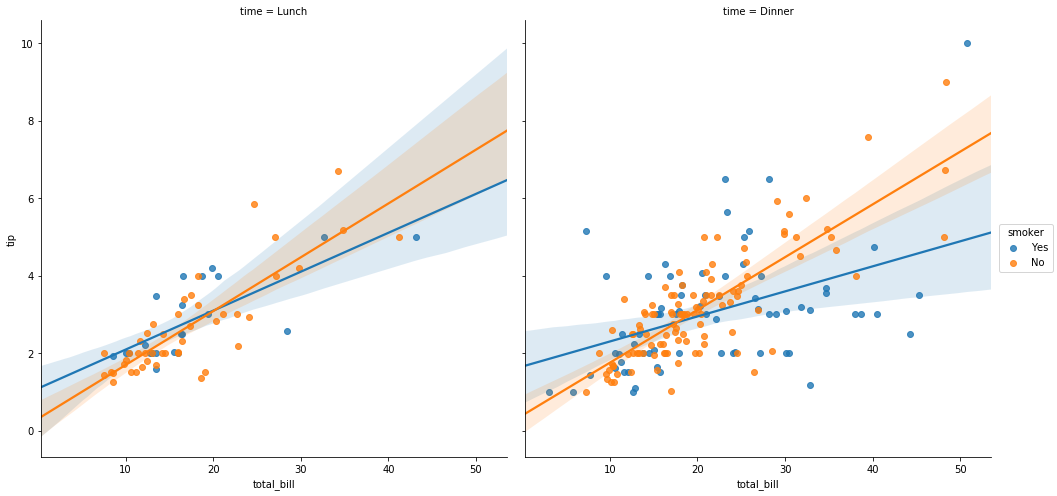

In [127]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips, size=7);

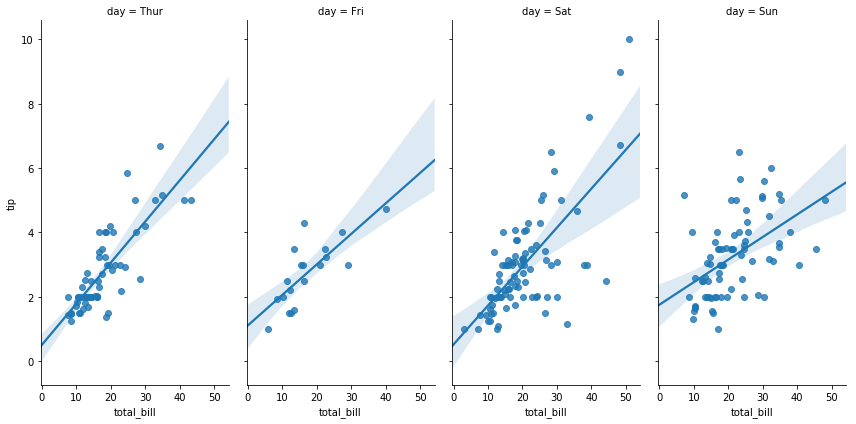

In [129]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=.5, size=6);

_Warning: Its' easy to go overboard when combining subplots, regressions, and conditional variables in a single chart_

# More Challenging Data Visualizations

# Visualizing higher-dimensioned data

<img src="http://blog.kaggle.com/wp-content/uploads/2015/04/iris_petal_sepal.png">

In [11]:
iris_df = sns.load_dataset('iris')
iris_df.sample(10)


,sepal_length,sepal_width,petal_length,petal_width,species
119,6.0,2.2,5.0,1.5,virginica
114,5.8,2.8,5.1,2.4,virginica
97,6.2,2.9,4.3,1.3,versicolor
83,6.0,2.7,5.1,1.6,versicolor
147,6.5,3.0,5.2,2.0,virginica
102,7.1,3.0,5.9,2.1,virginica
39,5.1,3.4,1.5,0.2,setosa
59,5.2,2.7,3.9,1.4,versicolor
108,6.7,2.5,5.8,1.8,virginica
52,6.9,3.1,4.9,1.5,versicolor


# Pair plots
Show the relationships and distributions of each pairs of columns in your data

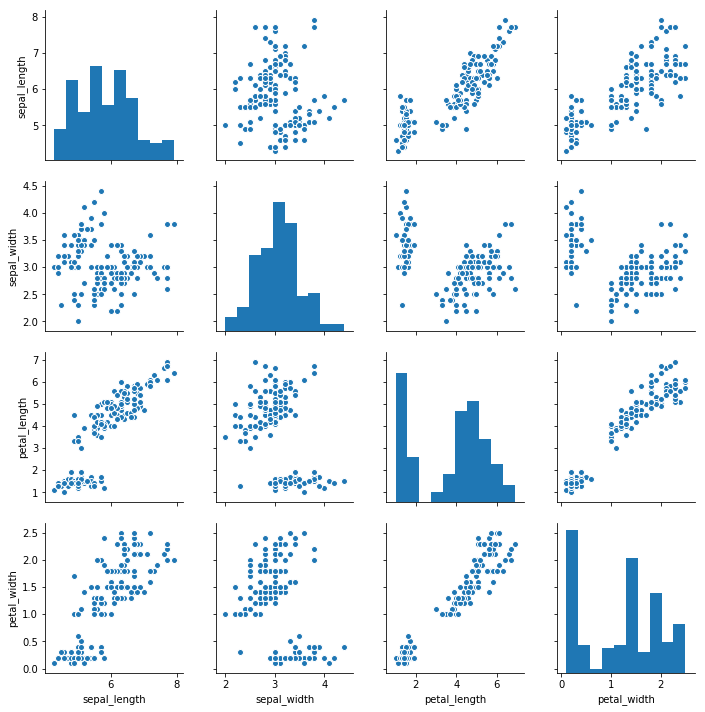

In [131]:
sns.pairplot(iris_df)
plt.show()

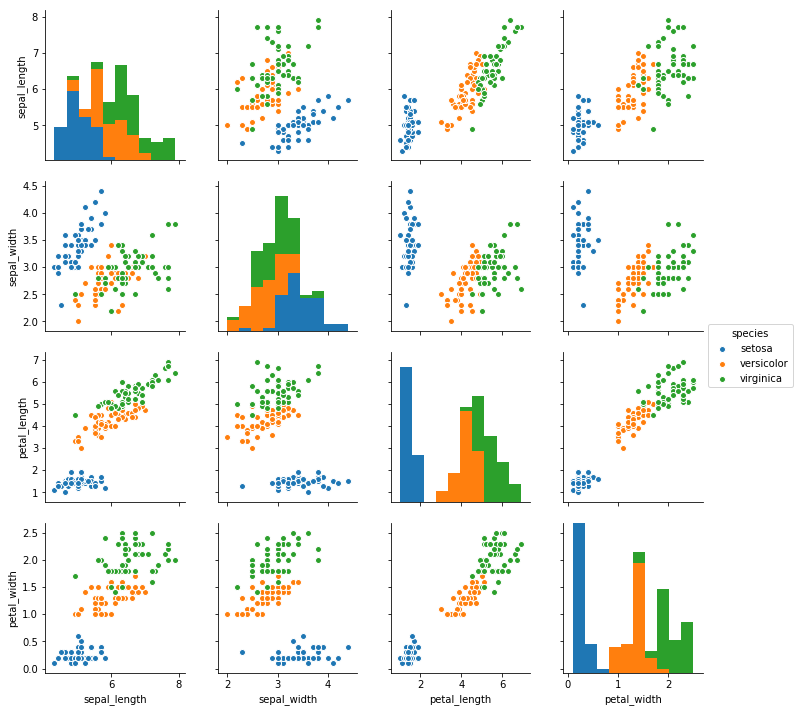

In [13]:
sns.pairplot(iris_df, hue="species")
plt.show()

# Maps

In [1]:
import folium
i_academy_coords = [14.5614,121.02]
map = folium.Map(location=i_academy_coords, zoom_start=20)
folium.Marker(location=i_academy_coords, popup="PyCon 2018").add_to(map)
# map.save("map.html")
map

# Network Graphs with `networkx`

Build up a graph from nodes and edges

In [154]:
import networkx as nx

G = nx.Graph()
G.add_node('Alice') # nodes
G.add_node('Bob')
G.add_node('Charlie')
G.add_node('Dennis')
G.add_node('Ed')
G.add_node('Francis')
G.add_node('Gary')
G.add_edge('Alice','Bob') # edges
G.add_edge('Charlie','Dennis')
G.add_edge('Alice','Charlie')
G.add_edge('Bob','Dennis')
G.add_edge('Alice','Ed')
G.add_edge('Ed','Francis')
G.add_edge('Ed','Gary')

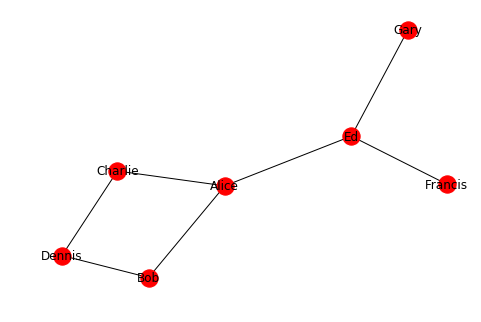

In [145]:
nx.draw(G, with_labels=True, label_pos=(10,10) )

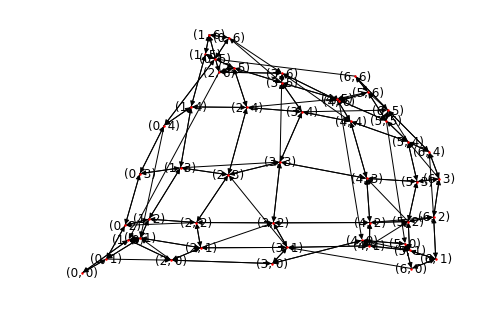

In [148]:
small_world = nx.navigable_small_world_graph(7)
nx.draw_spectral(small_world, node_size=2, with_labels=True)

# Unstructured data

<img src=http://brianbaquiran.com/images/wordcloud.png>

# Working with Text
the "bag of words" model






In [149]:
nursery_rhyme = [
    'Jack and Jill went up the hill', 
    'to fetch a pail of water',
    'Jack fell down',
    'and broke his crown', 
    'and Jill came tumbling, after',
]

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(nursery_rhyme)
print(tdm.toarray())

[[0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]]


## Term-document Matrix
* each column is a term (word)
* each row is a document 
* cells denote the number of times the term is present in the document

<img src="http://www.jiem.org/index.php/jiem/article/viewFile/293/252/2402">

In [19]:
df = pd.DataFrame(tdm.toarray(), columns=vectorizer.get_feature_names(),index=nursery_rhyme)
print("This is a {}-dimensional representation of the text".format(df.shape[1]))
df

This is a 20-dimensional representation of the text


,after,and,broke,came,crown,down,fell,fetch,hill,his,jack,jill,of,pail,the,to,tumbling,up,water,went
Jack and Jill went up the hill,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1
to fetch a pail of water,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0
Jack fell down,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
and broke his crown,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
"and Jill came tumbling, after",1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


# TDM as an image

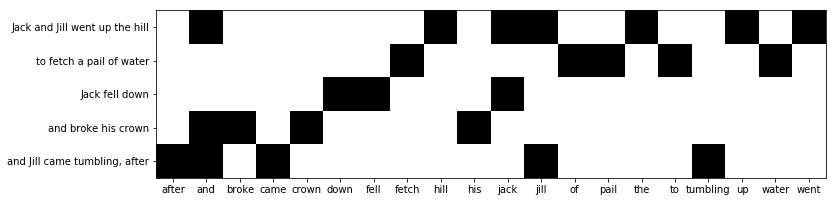

In [20]:
import matplotlib.cm as cm  # Colormaps

feature_names = vectorizer.get_feature_names()

plt.figure(figsize=figsize)
plt.imshow(df, cmap=cm.binary)
plt.xticks(range(len(feature_names)), feature_names)
plt.yticks(range(len(nursery_rhyme)), nursery_rhyme)
plt.show()

Black squares are cells where the document (y-axis) contains the term (x-axis)

# Text Preprocessing Tasks

* Eliminate _stopwords_
* Normalize words with _stemming_ or _lemmatization_
* Limit to _n_ most informative words
* Use tf-idf to assign weight to words based on relative frequency



In [21]:
yelp = pd.read_table("sentiment labelled sentences/yelp_labelled.txt",  names=['text','sentiment'])
yelp.sample(10)

,text,sentiment
822,I love that they put their food in nice plasti...,1
330,The servers are not pleasant to deal with and ...,0
945,The chipolte ranch dipping sause was tasteless...,0
463,The manager was the worst.,0
518,"Anyway, I do not think i will go back there.",0
919,"What SHOULD have been a hilarious, yummy Chris...",0
618,They really want to make your experience a goo...,1
617,"Despite how hard I rate businesses, its actual...",0
7,The potatoes were like rubber and you could te...,0
367,Would come back again if I had a sushi craving...,1


# Use `sklearn` tf-idf vectorizer

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
yelp_tdm = vectorizer.fit_transform(yelp.text)
print("TDM has dimensions: {} rows, {} columns".format(*yelp_tdm.shape))

TDM has dimensions: 1000 rows, 1000 columns


/home/brian/pydata/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


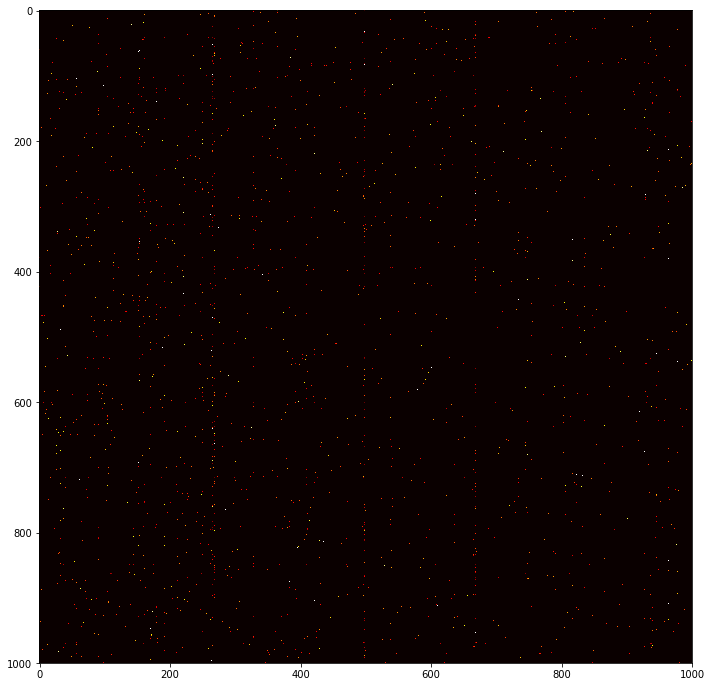

In [160]:
plt.figure(figsize=figsize)
plt.imshow(yelp_tdm.toarray(), cmap="hot")
plt.show()

In [44]:
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import ward, dendrogram
dist = cosine_distances(yelp_tdm)
linkage_matrix = ward(dist)
dendrogram(linkage_matrix, orientation="right");


In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
yelp_cluster = km.fit_transform(yelp_tdm)

# Use dimensionality reduction to convert 300-dimension array to 2-dimensions

Decomposed to 1000 rows by 2 columns


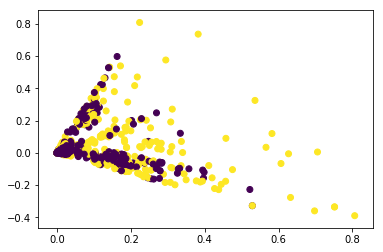

In [23]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD()
yelp_decomp = tsvd.fit_transform(yelp_tdm)
print("Decomposed to {} rows by {} columns".format(*yelp_decomp.shape))
x, y = yelp_decomp[:,0], yelp_decomp[:,1]
plt.scatter(x,y, c=yelp.sentiment)
plt.show()

# Takeaways
* Python offers many tools for data viz, at varying levels of ease-of-use and power
* Simple charts on structured data are super easy to produce with `pandas`, `matplotlib` and `seaborn`
* Representing your data in "tidy" table formats make analysis and viz much easier
* Unstructured data (e.g. text) can be quantified and visualized, if you can find the right representation and apply the appropriate transformations


<img src="pezlogo.png">
